In [2]:
import geopandas as gp

In [93]:
from  geopy.geocoders import Nominatim
def get_ll(city, country):
    geolocator = Nominatim()
    loc = geolocator.geocode(city+','+ country)
    return loc.longitude, loc.latitude

In [98]:
get_ll('Hyderabad', 'India')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.



GeocoderTimedOut: Service timed out

In [5]:
#http://projects.datameet.org/maps/

In [73]:
df = gp.read_file('2011_Dist.shp')

In [74]:
df.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84971964418659 19.76010317003102,..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803304934094 27.40279950600495,..."
2,Ahmadabad,Gujarat,24,7,474,(POLYGON ((72.03455573137722 23.50527451382363...
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67332670904928 19.9466963435567, ..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749173520596 24.40452847808963,..."


In [78]:
states = list(df["ST_NM"].unique())
len(states)

35

In [85]:
states

['Andhra Pradesh',
 'Uttar Pradesh',
 'Gujarat',
 'Maharashtra',
 'Mizoram',
 'Rajasthan',
 'Kerala',
 'Madhya Pradesh',
 'Uttarakhand',
 'Haryana',
 'Punjab',
 'Jammu & Kashmir',
 'Arunanchal Pradesh',
 'Odisha',
 'Bihar',
 'Tamil Nadu',
 'Karnataka',
 'Assam',
 'West Bengal',
 'Chhattisgarh',
 'Himachal Pradesh',
 'Manipur',
 'Jharkhand',
 'NCT of Delhi',
 'Chandigarh',
 'Dadara & Nagar Havelli',
 'Daman & Diu',
 'Tripura',
 'Nagaland',
 'Sikkim',
 'Meghalaya',
 'Puducherry',
 'Goa',
 'Andaman & Nicobar Island',
 'Lakshadweep']

In [82]:
sample_colors = ["pink","red","orange","blue","black","purple","green"]

In [83]:
colors = []
for i in range(35):
    colors.append(sample_colors[i%7])
colors

['pink',
 'red',
 'orange',
 'blue',
 'black',
 'purple',
 'green',
 'pink',
 'red',
 'orange',
 'blue',
 'black',
 'purple',
 'green',
 'pink',
 'red',
 'orange',
 'blue',
 'black',
 'purple',
 'green',
 'pink',
 'red',
 'orange',
 'blue',
 'black',
 'purple',
 'green',
 'pink',
 'red',
 'orange',
 'blue',
 'black',
 'purple',
 'green']

In [8]:
import matplotlib.pyplot as plt

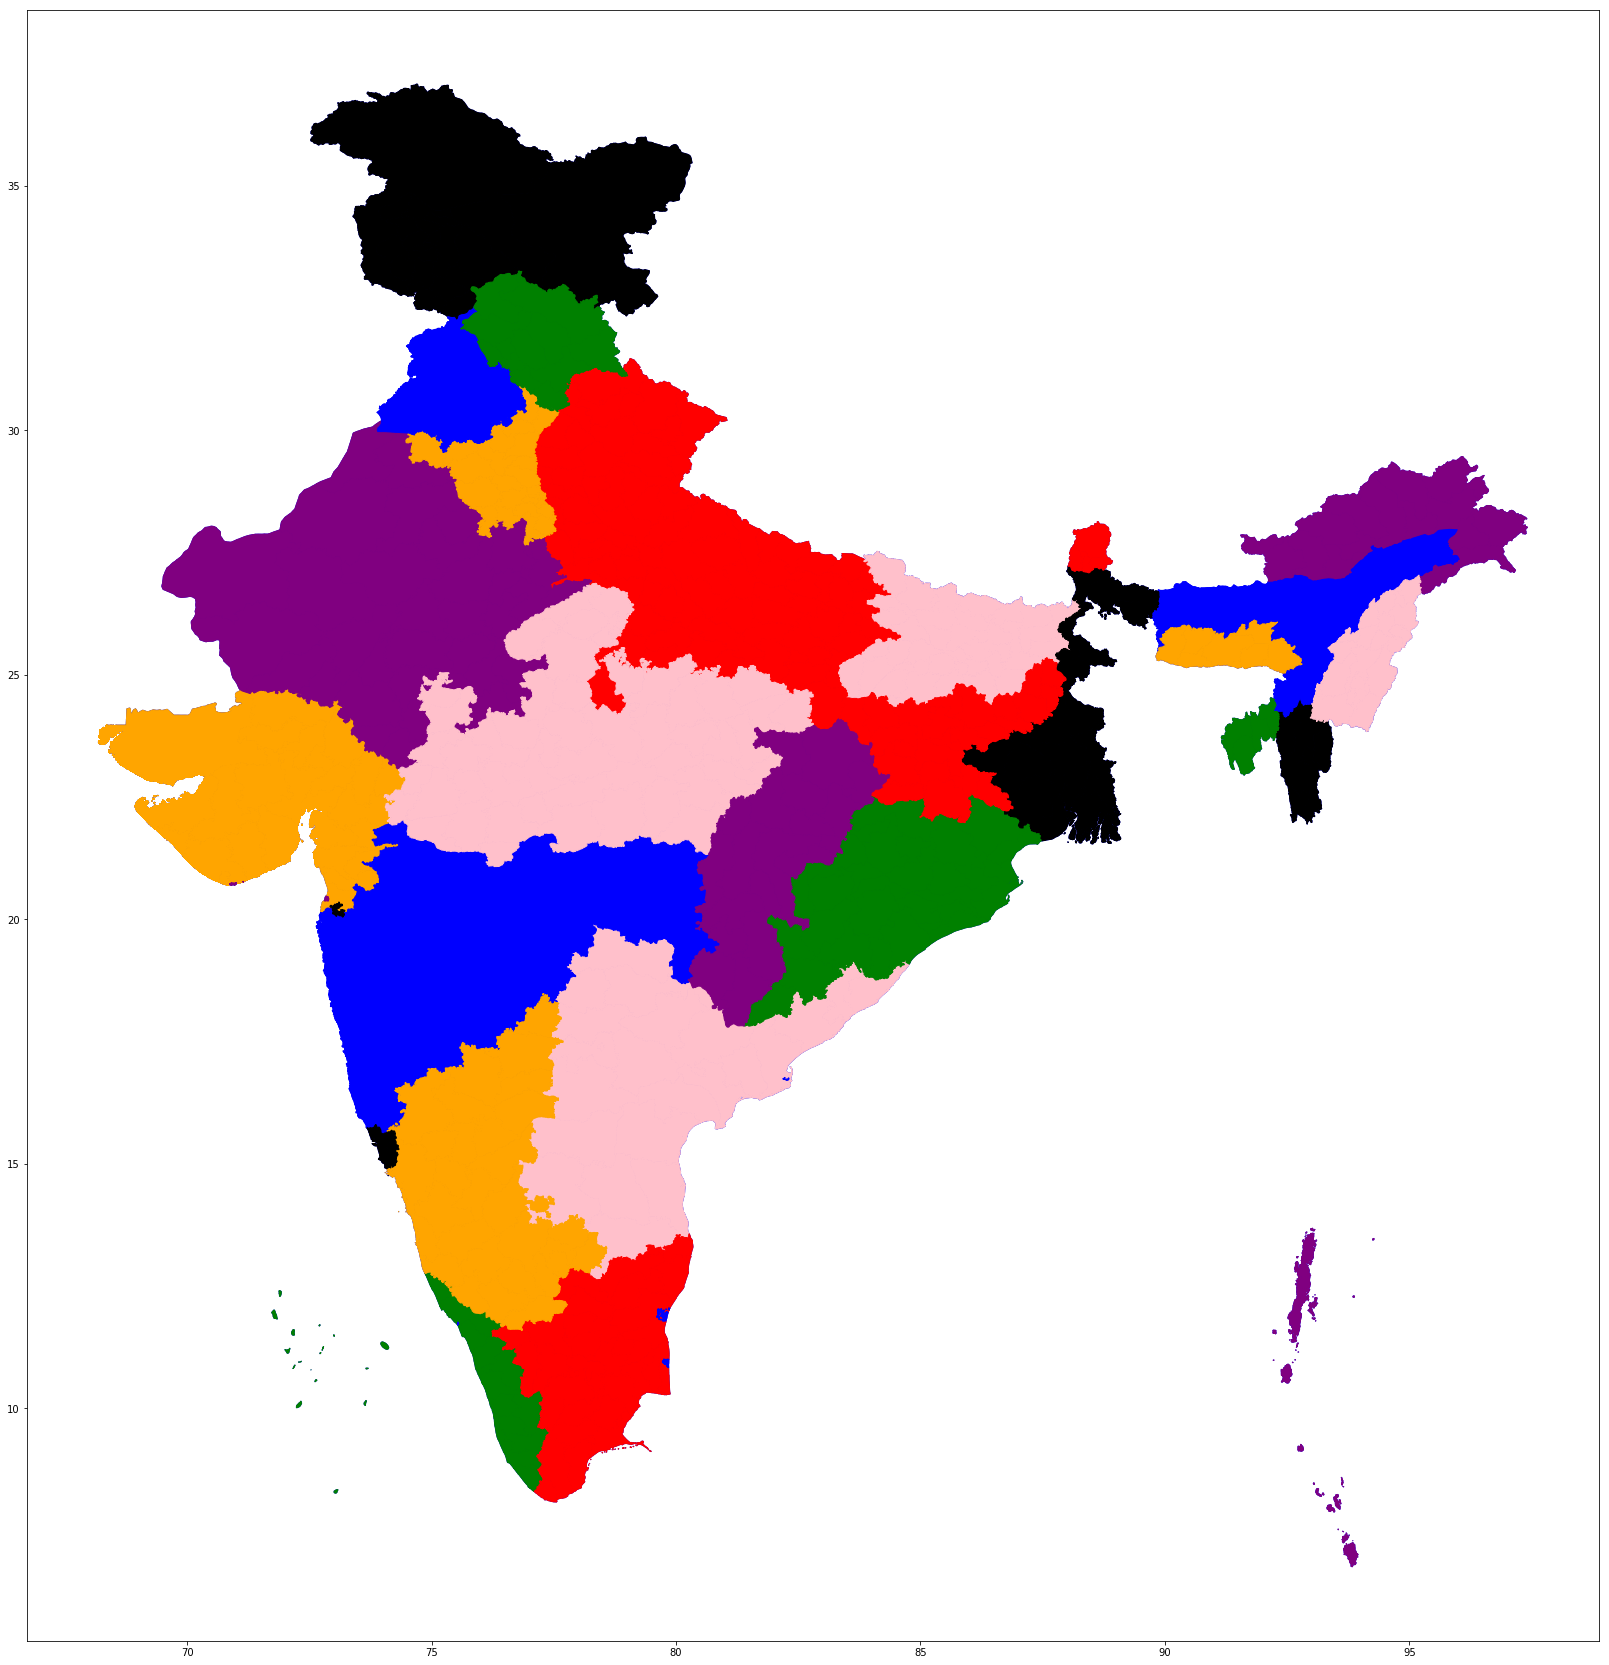

In [96]:
%matplotlib inline
fig1, ax1 = plt.subplots(figsize=(30,30))
df.plot(ax=ax1, edgecolor='blue' , color = 'blue')
for i in range(35):
    to = df[df['ST_NM'] == states[i]]
    #print(to)
    to.plot(ax=ax1, color=colors[i], edgecolor=colors[i], legend = True)
    #locs = get_ll(states[i],"India")
    #ax1.annotate(states[i], (locs.x, locs.y), color='yellow')

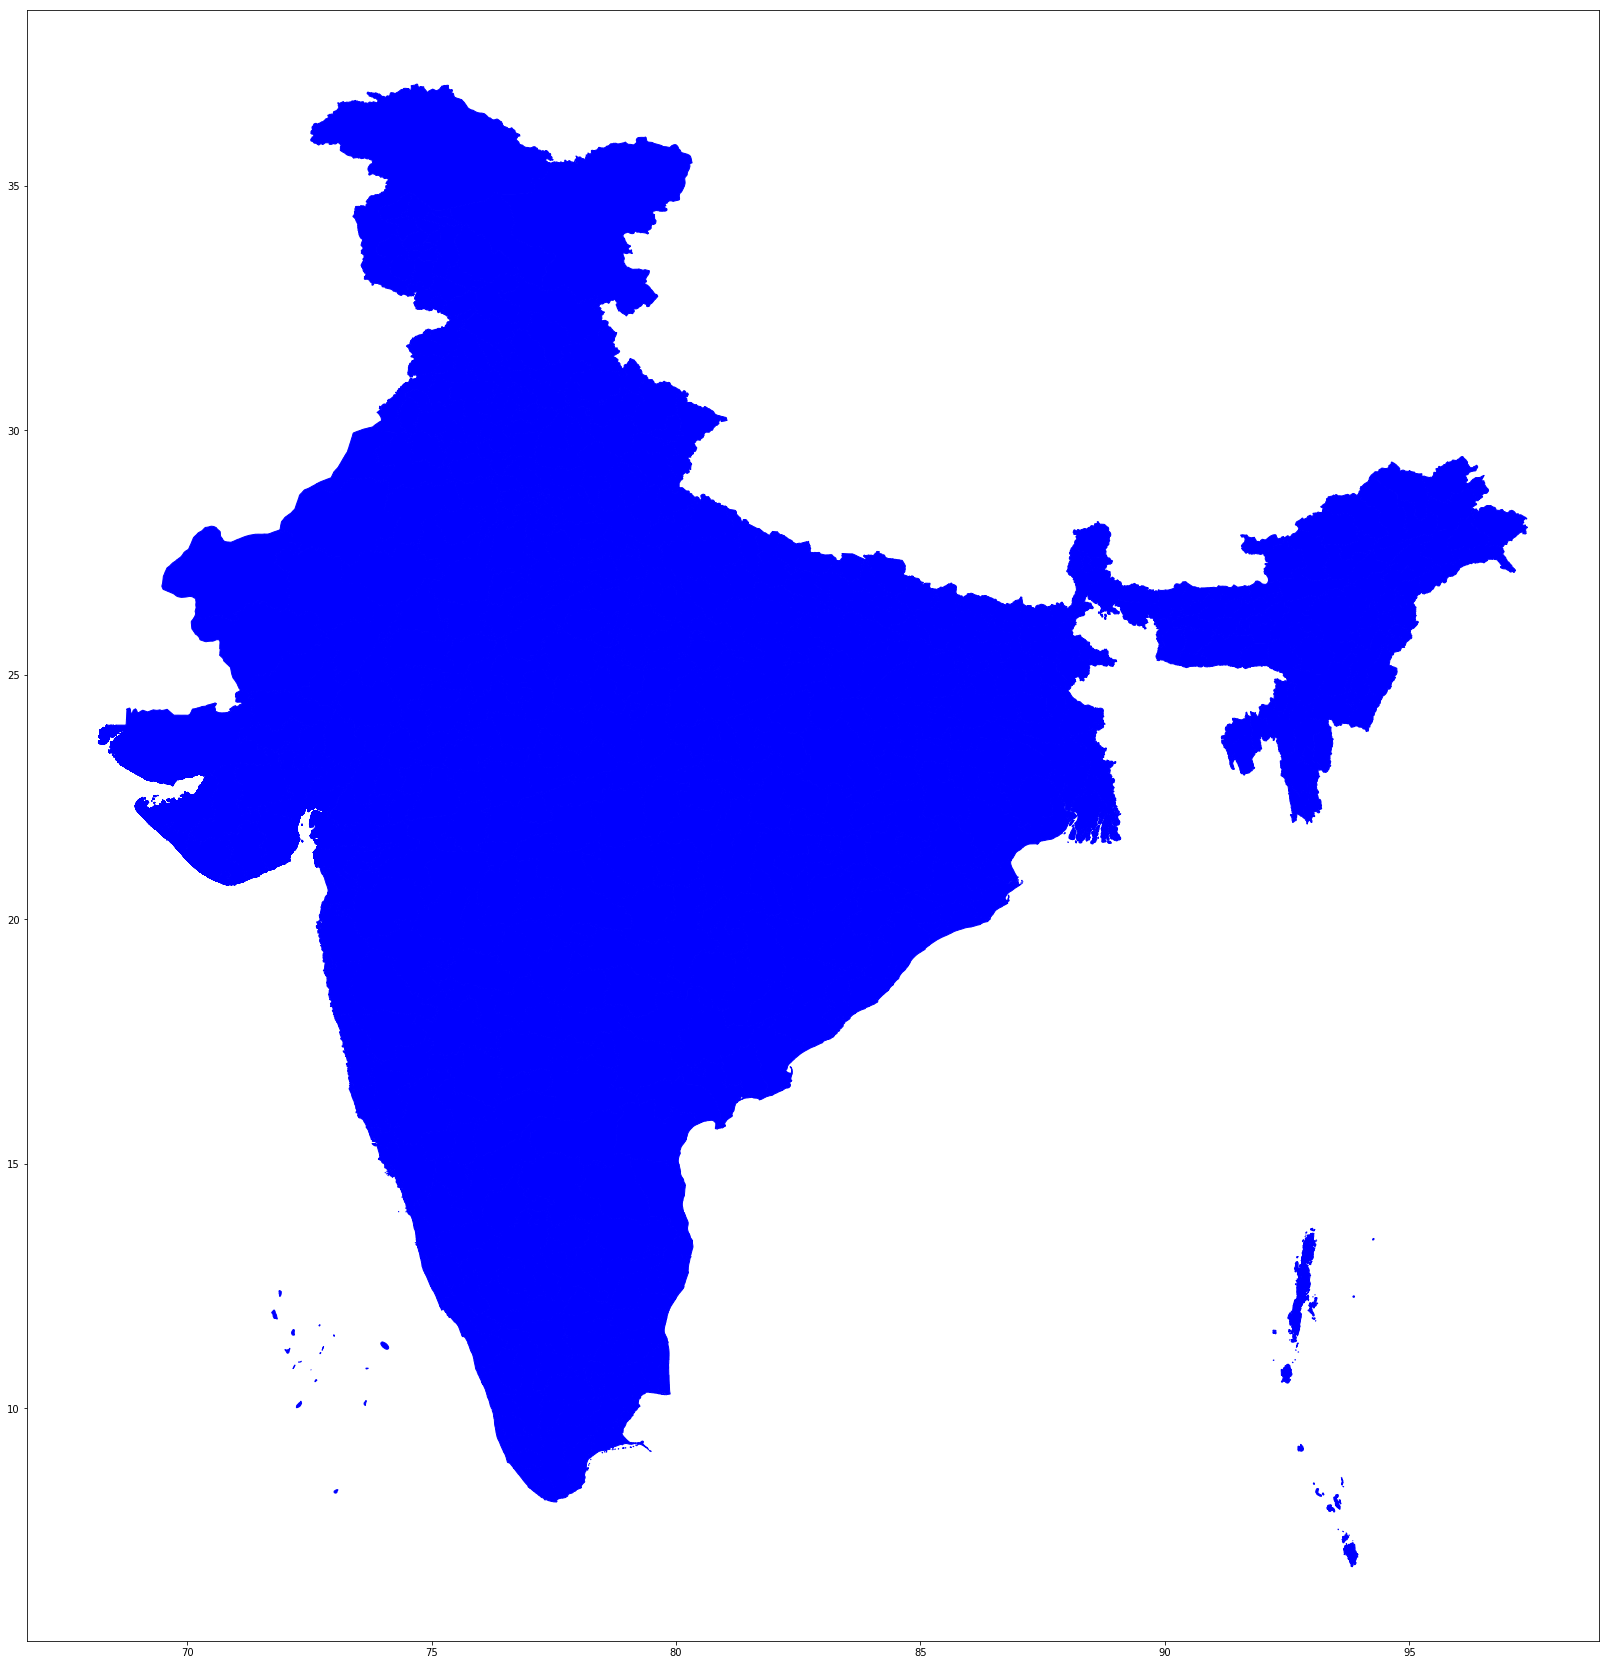

In [28]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(30,30))
df.plot(ax=ax, edgecolor='blue' , color = 'blue')

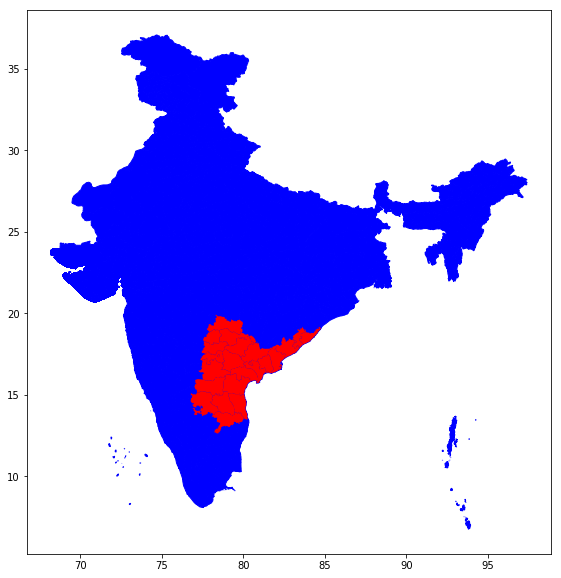

In [27]:
fig1, ax1 = plt.subplots(figsize=(10,10))
df.plot(ax=ax1, edgecolor='blue' , color = 'blue')
ap = df[df['ST_NM']=='Andhra Pradesh']
ap.plot(ax=ax1, color='red')

In [11]:
import shapely

In [12]:
cities = ['Hyderabad','Nizamabad','Warangal','Chennai','Guntur','Kannur','Bhopal']

In [13]:
points = [shapely.geometry.point.Point(get_ll(city, 'India')) for city in cities]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
import pandas as pd

In [15]:
cities = pd.DataFrame(cities, columns=['cityname'])

In [16]:
cities['geometry'] = points

In [17]:
cities

,cityname,geometry
0,Hyderabad,POINT (78.4746286 17.3616079)
1,Nizamabad,POINT (78.0978477 18.6732693)
2,Warangal,POINT (79.60439940000001 17.9899747)
3,Chennai,POINT (80.2838331 13.0801721)
4,Guntur,POINT (80.4541588 16.2915189)
5,Kannur,POINT (75.3738043 11.8762254)
6,Bhopal,POINT (77.39627179999999 23.2530923)


In [18]:
ap = df[df['ST_NM']=='Andhra Pradesh']
gdf = gp.GeoDataFrame(cities, crs=ap.crs)

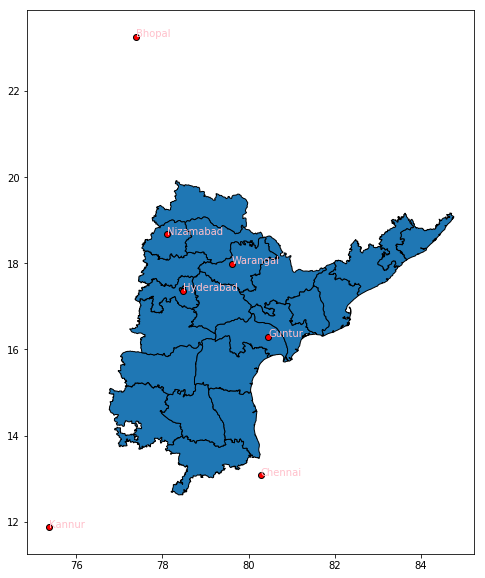

In [19]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))
ap.plot(ax=ax, edgecolor='black')
gdf.plot(ax=ax, edgecolor='black', color='red')
for index, city in cities.iterrows():
    ax.annotate(city['cityname'], (city['geometry'].x, city['geometry'].y), color='pink')

In [97]:
fig1.savefig('multicolor.png')